In [66]:
#data handling, model creation/evaluation
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
#need to install pip install -U textblob & python -m textblob.download_corpora

#make it so that we only show first 4 decimals for floats
np.set_printoptions(precision=4,suppress=True)

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
IndeedData = pd.read_csv('C:\\Users\\Drace\\Documents\\WebScrapeProj\\IndeedCsvs\\alldata.csv')

In [3]:
IndeedData['salary'] = IndeedData.loc[IndeedData['salary'] <200, 'salary'] * 2280
IndeedData.describe()

D:\Drace\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,salary,worklife,compensation,jobsecurity,management,culture
count,1497.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000
mean,42564.401603,3.744238,3.743652,3.368794,3.436348,3.715550
std,29961.104628,0.368861,0.383780,0.385421,0.391134,0.389667
min,17396.400000,1.500000,1.300000,1.500000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,399000.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
SalaryRatings = pd.read_csv('C:\\Users\\Drace\\Documents\\WebScrapeProj\\IndeedCsvs\\indeedSR.csv')

In [5]:
SalaryRatings.loc[SalaryRatings['salary'] <116, 'salary'] = SalaryRatings.loc[SalaryRatings['salary'] <116, 'salary'] * 2280

In [6]:
SalaryRatings.dropna().describe()

,salary,worklife,compensation,jobsecurity,management,culture
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,66125.294017,3.744226,3.744517,3.370958,3.438098,3.716385
std,39408.093054,0.358680,0.378876,0.376408,0.379415,0.378898
min,147.000000,1.500000,1.300000,1.600000,1.500000,1.500000
25%,35466.500000,3.500000,3.600000,3.200000,3.200000,3.500000
50%,55846.000000,3.800000,3.800000,3.400000,3.500000,3.700000
75%,90838.500000,4.000000,4.000000,3.600000,3.600000,3.900000
max,318664.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
SalaryRatings[SalaryRatings['salary'] ==SalaryRatings.salary.min()]

,company,position,salary,worklife,compensation,jobsecurity,management,culture
1255,CSX,Clerk,147.0,2.8,4.2,3.2,3.0,3.3


In [8]:
SalaryRatings[SalaryRatings['salary'] == SalaryRatings.salary.max()]

,company,position,salary,worklife,compensation,jobsecurity,management,culture
2894,Memorial Sloan Kettering,Radiologist,318664.0,4.0,4.2,3.8,3.6,4.0


In [9]:
SalaryRatings.company.value_counts()

#take companies with multiple listings
CompaniesSalaries = SalaryRatings.groupby('company').filter(lambda x: len(x) >20)

In [10]:
#positions with multiple listings by company
companyPosCluster =CompaniesSalaries.groupby('position').filter(lambda x: len(x) >20)

In [11]:
#positions with over 20 count
PositionCluster = IndeedData.groupby('position').filter(lambda x: len(x) >20)

In [12]:
SalaryMask = PositionCluster.salary > PositionCluster.salary.dropna().quantile(.95)

In [13]:
HighPayingComp = PositionCluster[SalaryMask]

In [14]:
SalaryNewMask = SalaryRatings.salary > SalaryRatings.salary.dropna().quantile(.995)
JobHighPay = SalaryRatings[SalaryNewMask]

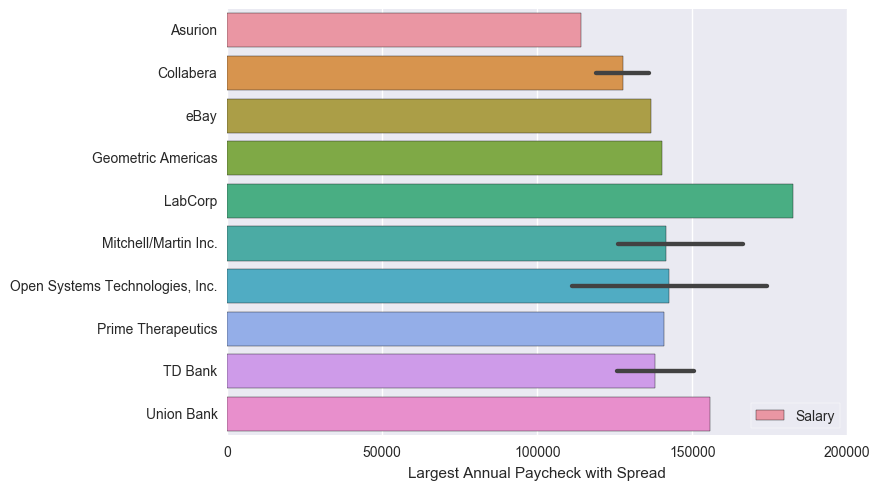

In [15]:
f, ax = plt.subplots()
sns.set_color_codes('pastel')
sns.barplot(x='salary', y = 'company', data = HighPayingComp, label = 'Salary')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Largest Annual Paycheck with Spread")
sns.despine(left=True, bottom=True)

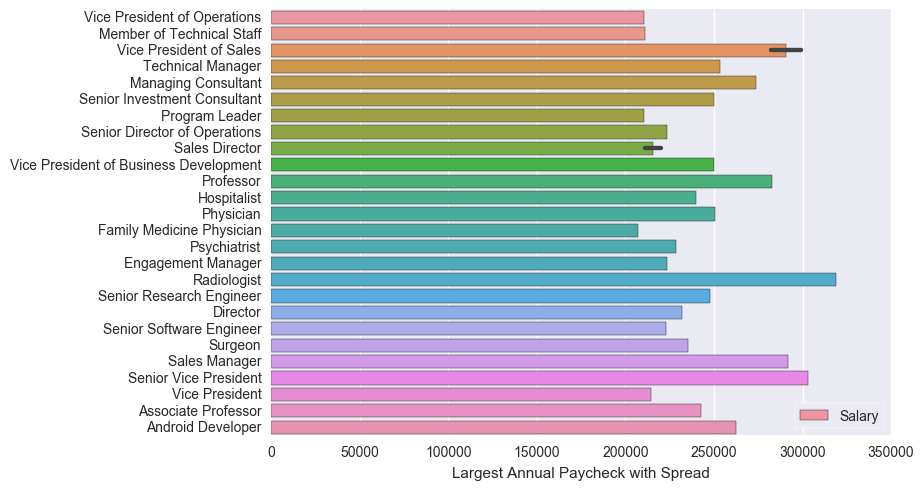

In [16]:
f, ax = plt.subplots()
sns.set_color_codes('muted')
sns.barplot(x='salary', y = 'position', data = JobHighPay, label = 'Salary')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Largest Annual Paycheck with Spread")
sns.despine(left=True, bottom=True)

In [17]:
ReviewStars = ['worklife','compensation','jobsecurity','management','culture']

In [18]:
CompaniesSalaries['Overall'] = CompaniesSalaries[ReviewStars].sum(axis =1)

D:\Drace\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
ReviewMask = CompaniesSalaries.Overall > CompaniesSalaries.Overall.dropna().quantile(.90)
PlaceToWork = CompaniesSalaries[ReviewMask]

D:\Drace\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


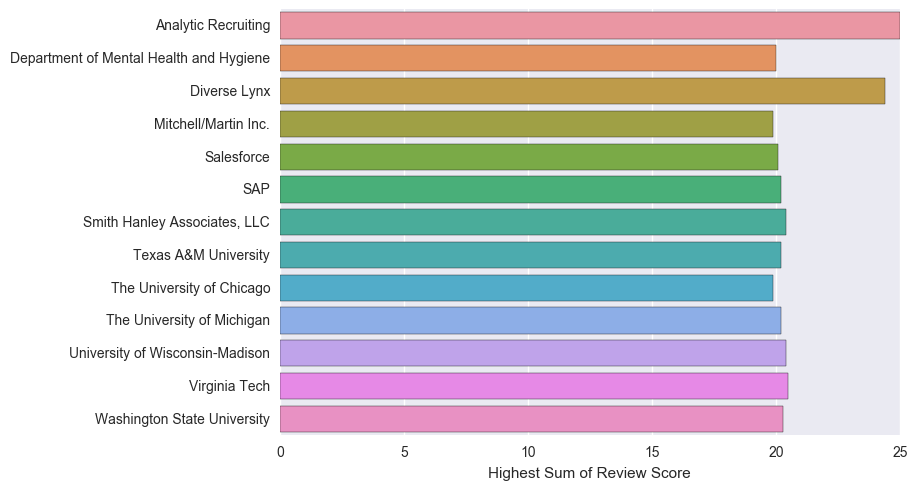

In [20]:
f, ax = plt.subplots()
sns.set_color_codes('bright')
sns.barplot(x='Overall', y = 'company', data = PlaceToWork)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Highest Sum of Review Score")
sns.despine(left=True, bottom=True)

In [21]:
PositionCluster = IndeedData.groupby('position').filter(lambda x: len(x) >20)

In [22]:
PositionCluster['Overall'] = CompaniesSalaries[ReviewStars].sum(axis =1)

D:\Drace\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
ReviewMask2 = PositionCluster.Overall > PositionCluster.Overall.dropna().quantile(.93)
JobToWork = PositionCluster[ReviewMask2]

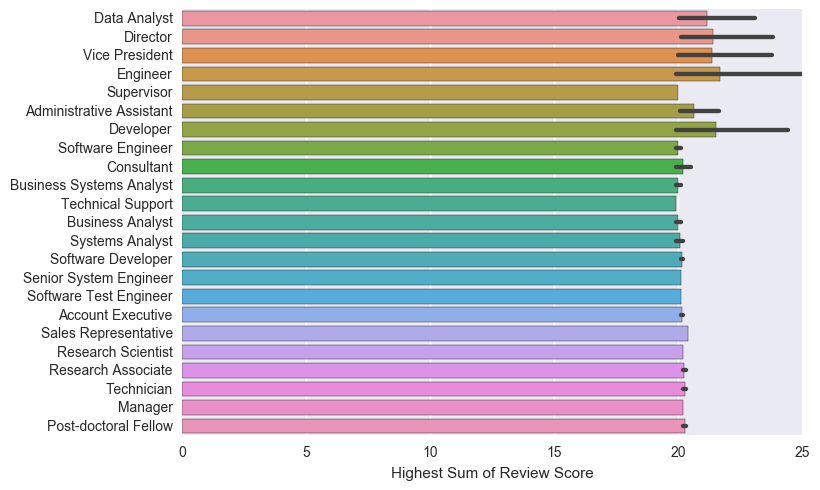

In [24]:
f, ax = plt.subplots()
sns.set_color_codes('bright')
sns.barplot(x='Overall', y = 'position', data = JobToWork)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Highest Sum of Review Score")
sns.despine(left=True, bottom=True)

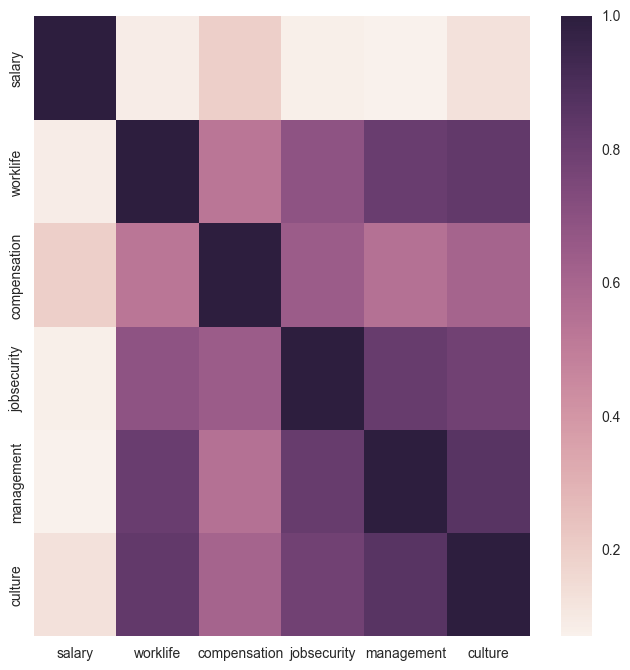

In [25]:
SalaryCorr = SalaryRatings.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(SalaryCorr)

In [74]:
x_features = salaryRatingdrop[ReviewStars]
y = salaryRatingdrop.salary
multi_linreg = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size = 0.3)
multi_linreg.fit(x_test, y_test)

coefs = multi_linreg.coef_
coef_zip = zip(ReviewStars, coefs)

Training Set (RSME):  38433.0769887
Testing Set (RSME):  38362.2817915
50 fold Cross Validate RMSE:  38378.9765899


In [27]:
coef_zip

[('worklife', -8523.1101958688942),
 ('compensation', 22234.232430283169),
 ('jobsecurity', -14219.852625017027),
 ('management', -6107.2374476599489),
 ('culture', 20374.307569211189)]

In [28]:
Coef = pd.DataFrame([{'Work Life Balance':1426, 'Compensation': 21143, 'Culture': 18500, 'Job Security': -16479, 'Management': -5390}])

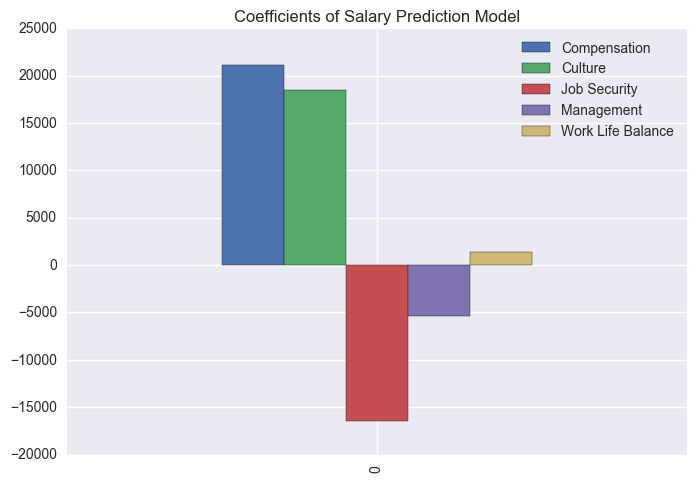

In [29]:
CoefPlot = Coef.plot(kind = 'bar', title='Coefficients of Salary Prediction Model')

In [82]:
#Not so fast, while this looks good, we need to assess accuracy

y_train_pred = multi_linreg.predict(x_train)
y_test_pred = multi_linreg.predict(x_test)
print 'Training Set (RSME): ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print 'Testing Set (RSME): ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  

multi_linreg2 = LinearRegression()
mSE = np.abs(cross_val_score(multi_linreg2, x_features, y, cv = 50, scoring = 'mean_squared_error'))
print '50 fold Cross Validate RMSE: ', np.mean(map(np.sqrt, mSE))

#Model is underfit, let's look at why

 Training Set (RSME):  38433.0769887
Testing Set (RSME):  38362.2817915
50 fold Cross Validate RMSE:  38378.9765899


D:\Drace\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


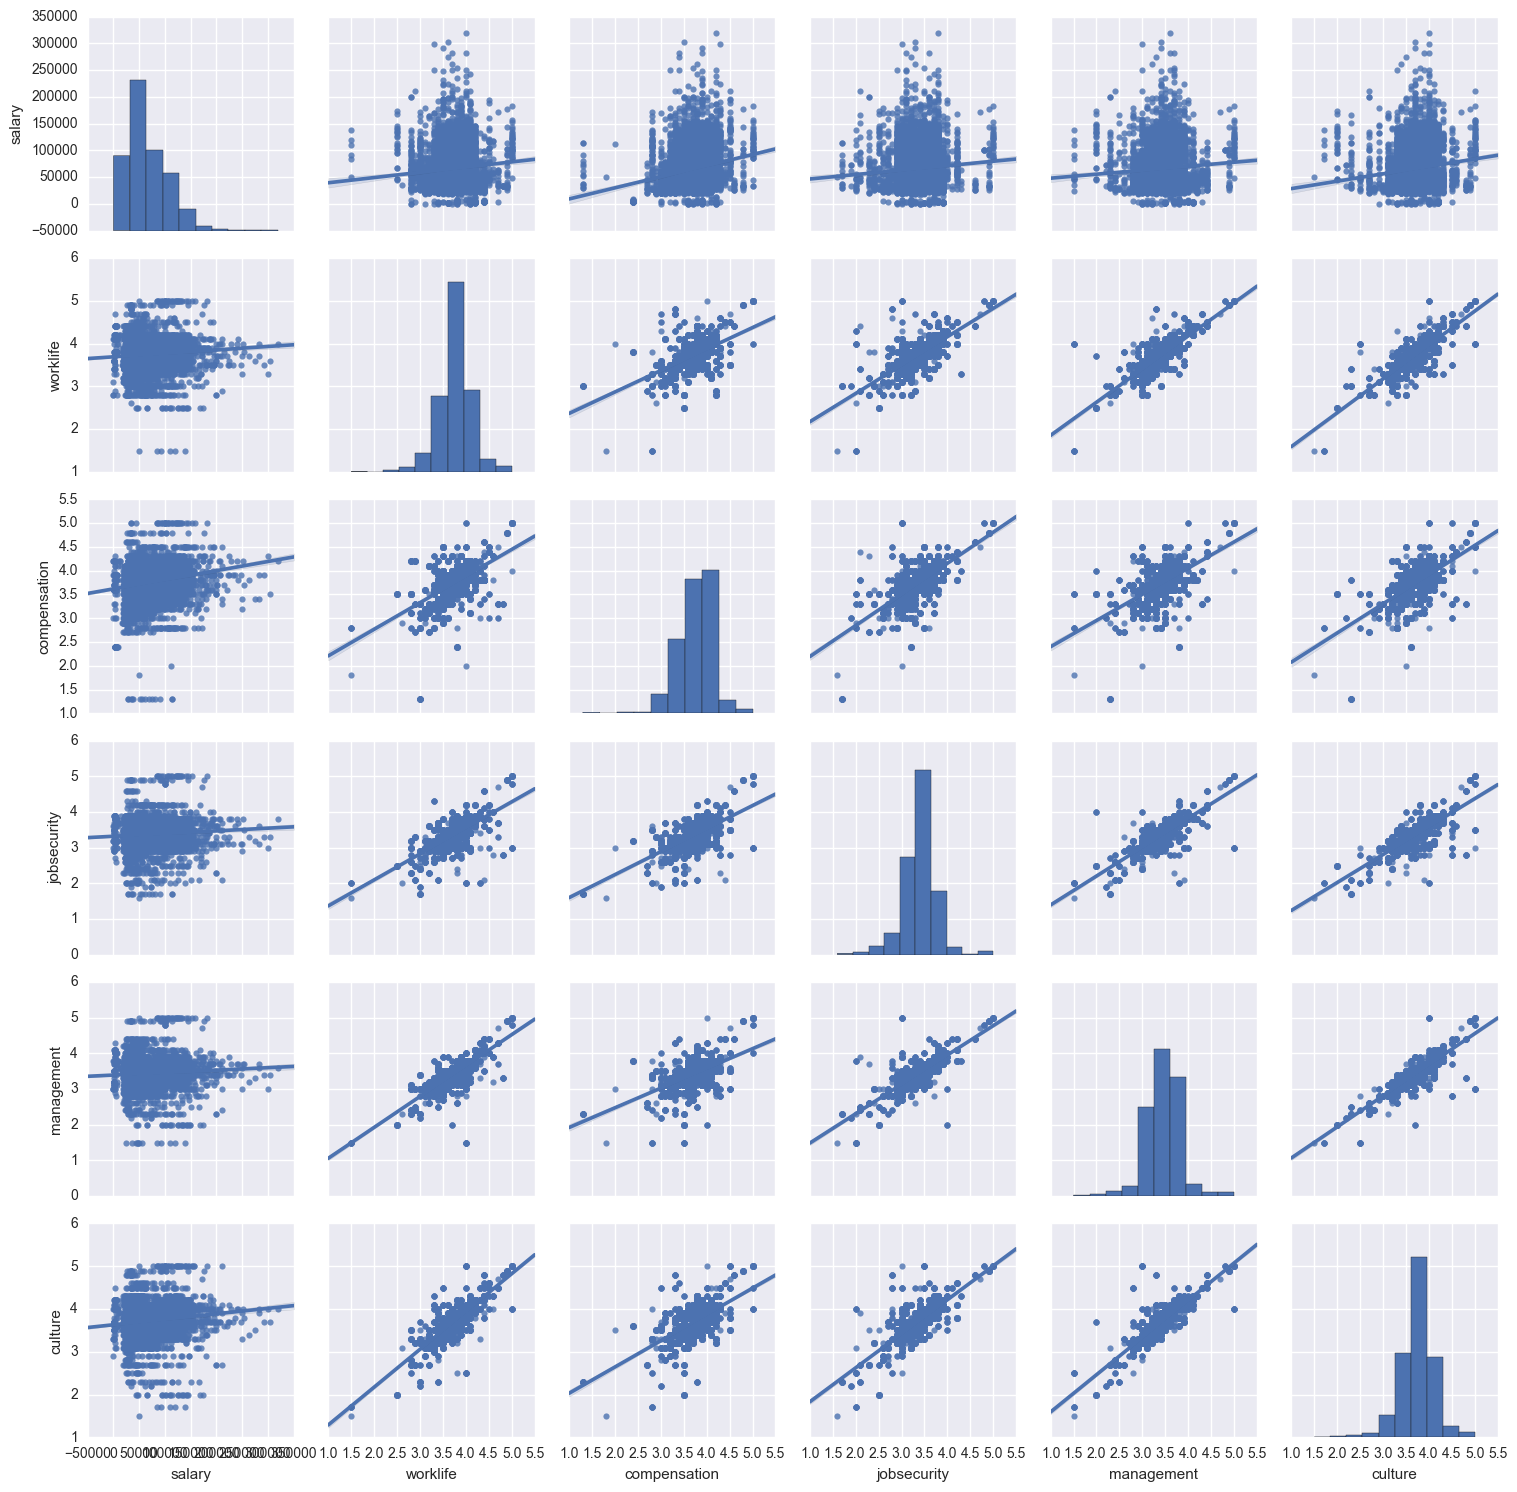

In [80]:
salaryRatingdrop = SalaryRatings.dropna()
#Some pairplots with salary quantiles
salaryRatingdrop['salary_quant'] = pd.cut(salaryRatingdrop['salary'], 4)
sns.pairplot(salaryRatingdrop, kind='reg', palette ='husl')

D:\Drace\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


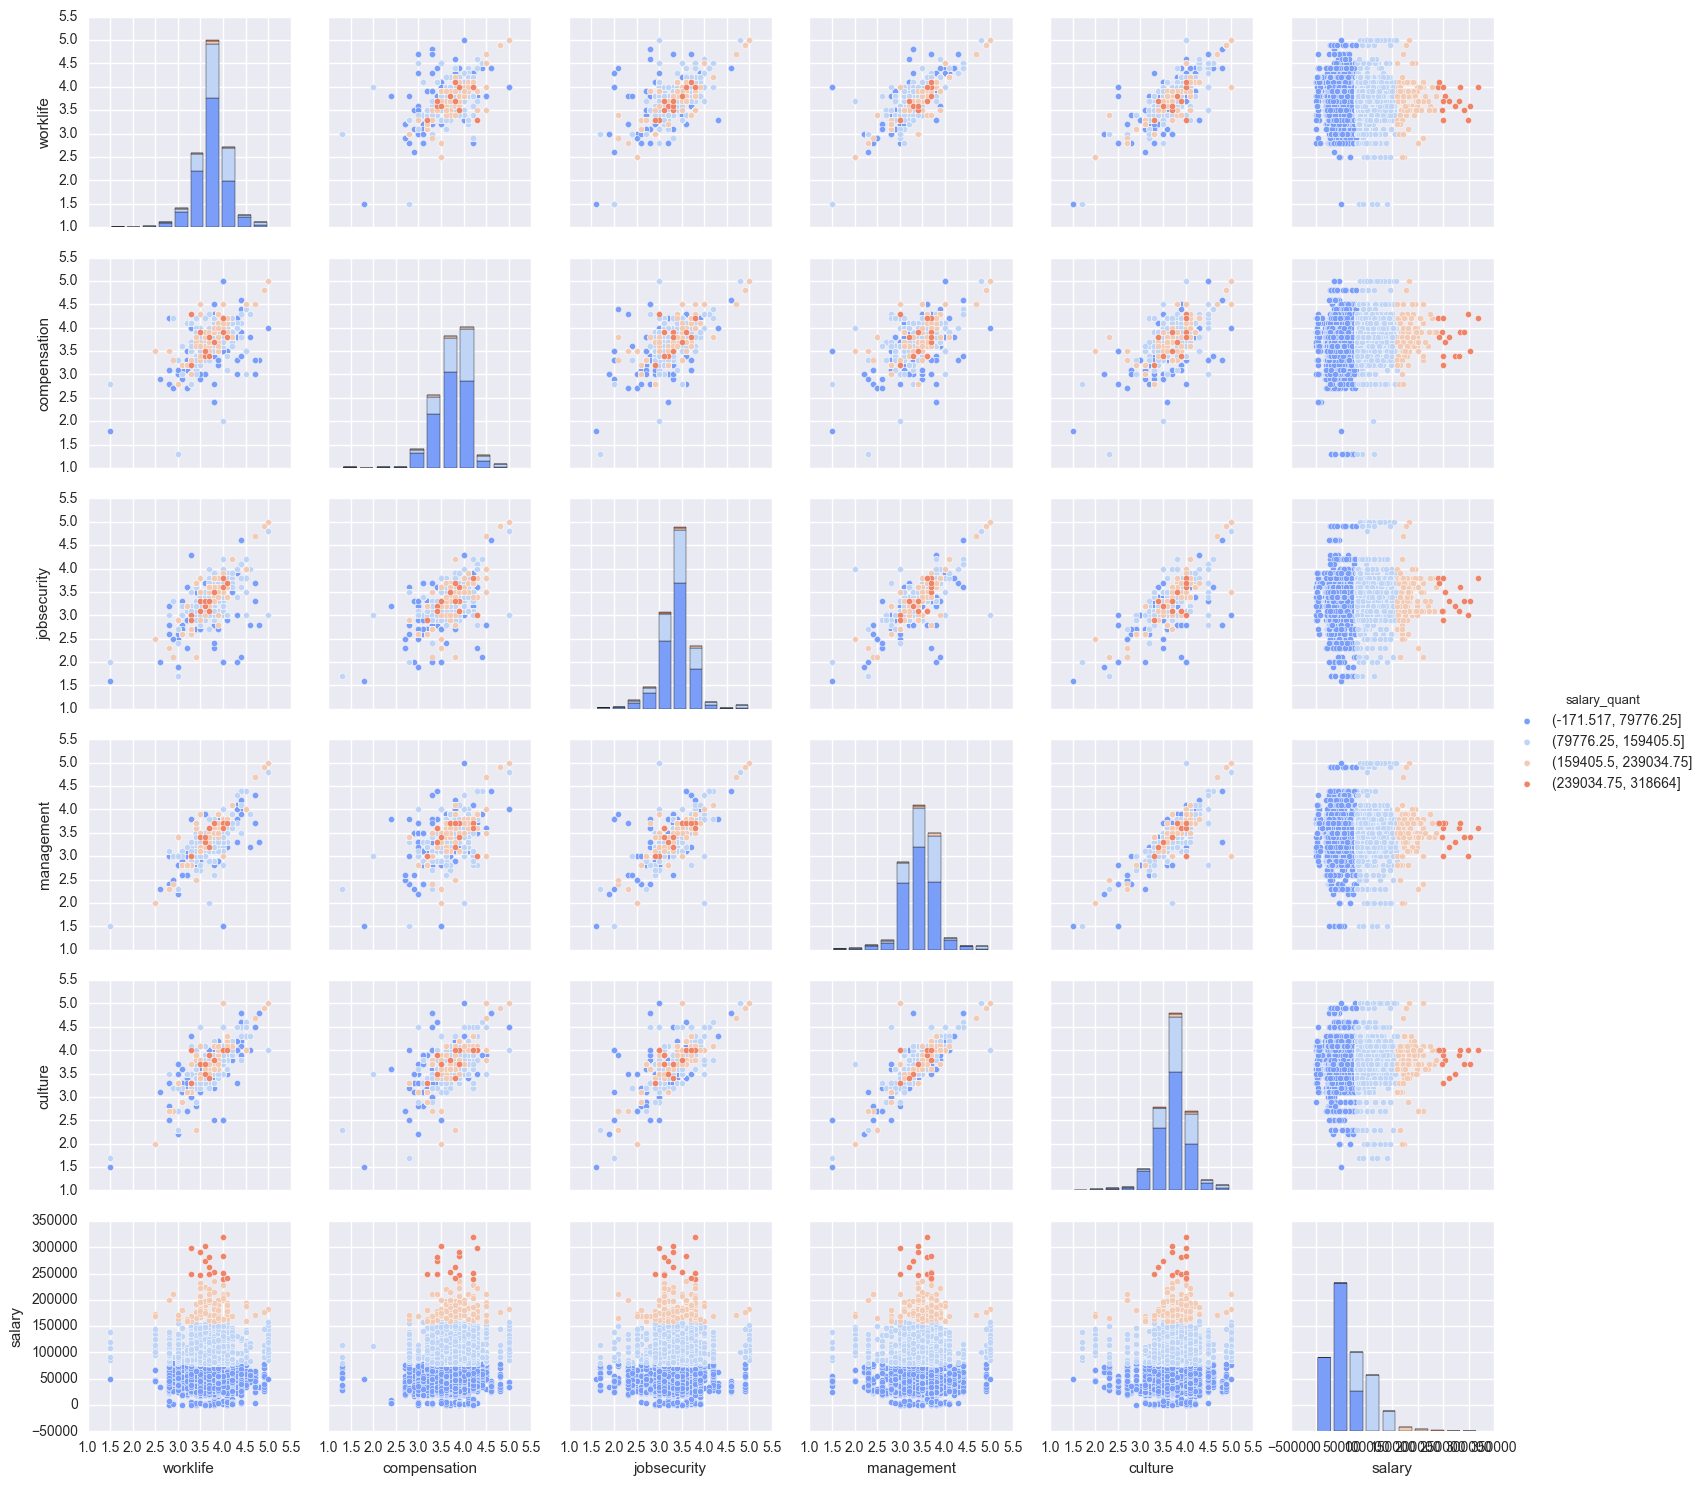

In [63]:

sns.pairplot(salaryRatingdrop[ReviewStars + ['salary'] + ['salary_quant']], hue = 'salary_quant', palette='coolwarm')

In [92]:
#Random Forest Classification attempt
features = ['salary','worklife','compensation','jobsecurity','management','culture']
X_tree = salaryRatingdrop[features]
y_target = salaryRatingdrop.position
#Transform string to float
le = preprocessing.LabelEncoder()
salaryRatingdrop.position = le.fit_transform(salaryRatingdrop.position)
x2_train, x2_test, y2_train, y2_test = train_test_split(X_tree, y_target, test_size = 0.3)


DecisionTree = DecisionTreeClassifier(max_depth = 3)
DecisionTree.fit(x2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
DecisionFeatures = pd.DataFrame({'Feature': features, 'Feature Importance': DecisionTree.feature_importances_})

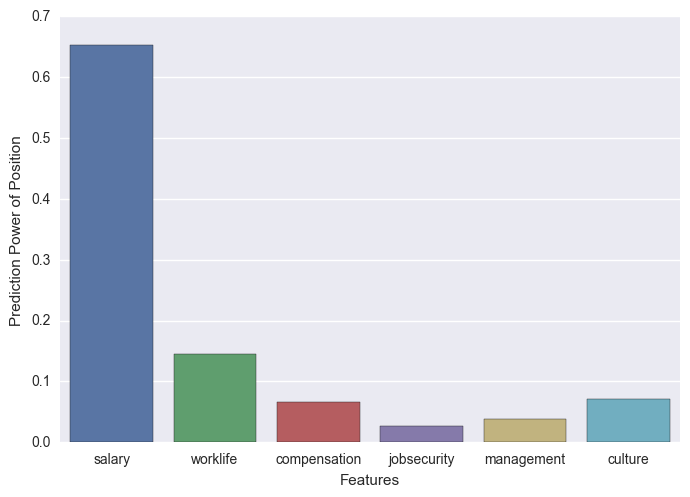

In [34]:
f, ax = plt.subplots()
sns.set_style("whitegrid")
sns.barplot(x="Feature", y="Feature Importance", data=DecisionFeatures)
ax.set(ylabel="Prediction Power of Position", xlabel = 'Features'
       )
sns.despine(left=True, bottom=True)

In [35]:
#estimator range for optimal tree counts
#estimator_range = range(20, 500, 20)
#storing RSME scores 
#RMSE_scores = []

#for estimator in estimator_range:
#    randFReg = RandomForestClassifier(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
#    randFReg.fit(x2_train,y2_train)
#    preds = randFReg.predict(x2_test)
#    rmse = np.sqrt(mean_squared_error(y2_test,preds))
#    RMSE_scores.append(rmse)
    
#plt.plot(estimator_range, RMSE_scores)
#plt.xlabel('n_estimators')
#plt.ylabel('RMSE (lower is better)')
#took too long to check
#didn't check optimal numbers

In [36]:
proData = pd.read_csv('C:\\Users\\Drace\\Documents\\WebScrapeProj\\IndeedCsvs\\UnnestedPros.csv')

In [37]:
conData = pd.read_csv('C:\\Users\\Drace\\Documents\\WebScrapeProj\\IndeedCsvs\\UnnestedCons.csv')

In [38]:
companyList = ['Amazon.com', 'Aetna', 'Groupon', 'Bloomberg', 'The Washington Post', 'JPMorgan Chase', 'GrubHub', 'Google', \
              'Honeywell', 'Blizzard Entertainment']
dataPro =  proData.loc[proData['company'].isin(companyList)]

In [39]:
ReviewData = pd.read_csv('C:\\Users\\Drace\\Documents\\WebScrapeProj\\IndeedCsvs\\UnnestedReviews.csv')

In [40]:
dataReviews = ReviewData.loc[ReviewData['company'].isin(companyList)]

In [41]:
for reviews in dataReviews.review:
    reviews = reviews.decode('utf-8')

In [42]:
WashingtonPostRev = dataReviews.loc[dataReviews['company'].isin(['The Washington Post'])]

In [43]:
SentimentPolarity = []
for i in WashingtonPostRev.review:
    feel = TextBlob(i)
    SentimentPolarity.append(feel.sentiment.polarity)

In [44]:
WashingtonPostRev['SentimentPolarity'] = SentimentPolarity

D:\Drace\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


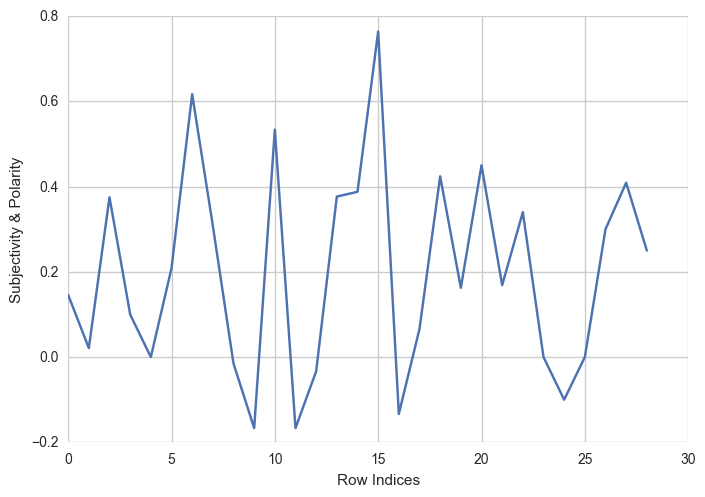

In [45]:
f, ax = plt.subplots()
sns.set_style("darkgrid")
plt.plot(WashingtonPostRev.SentimentPolarity)
ax.set(ylabel="Subjectivity & Polarity", xlabel = 'Row Indices'
       )
sns.despine(left=True, bottom=True)